## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [27]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = "無"

In [28]:
train, test = keras.datasets.cifar10.load_data()

In [29]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [30]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [31]:
from keras.layers import BatchNormalization

"""
建立神經網路，並加入 BN layer
"""
def build_mlp(input_shape, output_units=10, num_neurons=[2, 16, 32, 128, 256]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [32]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE =[2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [33]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "batch_size-%s"  % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2)                 6146      
_________________________________________________________________
batch_normalization_61 (Batc (None, 2)                 8         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 16)                48        
_________________________________________________________________
batch_normalization_62 (Batc (None, 16)                64        
_________________________________________________________________
hidden_layer3 (Dense)        (None, 32)                544       
_________________________________________________________________
batch_normalization_63 (Batc (None, 32)                128       
__________

50000/50000 [==============================] - 65s 1ms/step - loss: 2.2945 - acc: 0.1098 - val_loss: 2.3697 - val_acc: 0.1183
Epoch 47/50
50000/50000 [==============================] - 64s 1ms/step - loss: 2.2953 - acc: 0.1093 - val_loss: 2.4210 - val_acc: 0.1165
Epoch 48/50
50000/50000 [==============================] - 67s 1ms/step - loss: 2.2949 - acc: 0.1097 - val_loss: 2.5819 - val_acc: 0.1192
Epoch 49/50
50000/50000 [==============================] - 65s 1ms/step - loss: 2.2940 - acc: 0.1080 - val_loss: 2.4047 - val_acc: 0.1190
Epoch 50/50
50000/50000 [==============================] - 69s 1ms/step - loss: 2.2940 - acc: 0.1103 - val_loss: 2.5051 - val_acc: 0.1194
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_14 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 2)                 614

50000/50000 [==============================] - 14s 270us/step - loss: 2.3032 - acc: 0.1004 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 41/50
50000/50000 [==============================] - 13s 268us/step - loss: 2.3032 - acc: 0.0980 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 42/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.3032 - acc: 0.0980 - val_loss: 10.4477 - val_acc: 0.1000
Epoch 43/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.3033 - acc: 0.0971 - val_loss: 11.2890 - val_acc: 0.1000
Epoch 44/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.3033 - acc: 0.0984 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 45/50
50000/50000 [==============================] - 13s 267us/step - loss: 2.3033 - acc: 0.0971 - val_loss: 13.3050 - val_acc: 0.1000
Epoch 46/50
50000/50000 [==============================] - 13s 266us/step - loss: 2.3032 - acc: 0.0998 - val_loss: 12.1765 - val_acc: 0.1000
Epoch 47/50
50000/50000 [

Epoch 35/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0453 - acc: 0.1929 - val_loss: 2.0288 - val_acc: 0.2046
Epoch 36/50
50000/50000 [==============================] - 9s 178us/step - loss: 2.0446 - acc: 0.1933 - val_loss: 2.0388 - val_acc: 0.1968
Epoch 37/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0437 - acc: 0.1915 - val_loss: 2.0419 - val_acc: 0.2058
Epoch 38/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.0437 - acc: 0.1932 - val_loss: 2.0243 - val_acc: 0.1977
Epoch 39/50
50000/50000 [==============================] - 9s 177us/step - loss: 2.0413 - acc: 0.1954 - val_loss: 2.0430 - val_acc: 0.2016
Epoch 40/50
50000/50000 [==============================] - 9s 176us/step - loss: 2.0421 - acc: 0.1971 - val_loss: 2.0284 - val_acc: 0.1971
Epoch 41/50
50000/50000 [==============================] - 9s 174us/step - loss: 2.0407 - acc: 0.1942 - val_loss: 2.0443 - val_acc: 0.1989
Epoch 42/50
50000/50000 [==

50000/50000 [==============================] - 5s 95us/step - loss: 2.0212 - acc: 0.2002 - val_loss: 2.0219 - val_acc: 0.1998
Epoch 31/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0217 - acc: 0.2005 - val_loss: 2.0389 - val_acc: 0.1915
Epoch 32/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0207 - acc: 0.2041 - val_loss: 2.0225 - val_acc: 0.2000
Epoch 33/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0187 - acc: 0.2047 - val_loss: 2.0365 - val_acc: 0.1917
Epoch 34/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0204 - acc: 0.2049 - val_loss: 2.0575 - val_acc: 0.1891
Epoch 35/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0208 - acc: 0.2001 - val_loss: 2.0244 - val_acc: 0.2061
Epoch 36/50
50000/50000 [==============================] - 5s 95us/step - loss: 2.0195 - acc: 0.2030 - val_loss: 2.0217 - val_acc: 0.1953
Epoch 37/50
50000/50000 [=====================

50000/50000 [==============================] - 4s 80us/step - loss: 1.8781 - acc: 0.2895 - val_loss: 1.9211 - val_acc: 0.2776
Epoch 26/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8775 - acc: 0.2909 - val_loss: 1.8850 - val_acc: 0.2845
Epoch 27/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8767 - acc: 0.2918 - val_loss: 1.8881 - val_acc: 0.2882
Epoch 28/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8763 - acc: 0.2914 - val_loss: 1.9073 - val_acc: 0.2811
Epoch 29/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8762 - acc: 0.2913 - val_loss: 1.8862 - val_acc: 0.2858
Epoch 30/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8752 - acc: 0.2948 - val_loss: 1.8877 - val_acc: 0.2870
Epoch 31/50
50000/50000 [==============================] - 4s 80us/step - loss: 1.8747 - acc: 0.2932 - val_loss: 1.8802 - val_acc: 0.2868
Epoch 32/50
50000/50000 [=====================

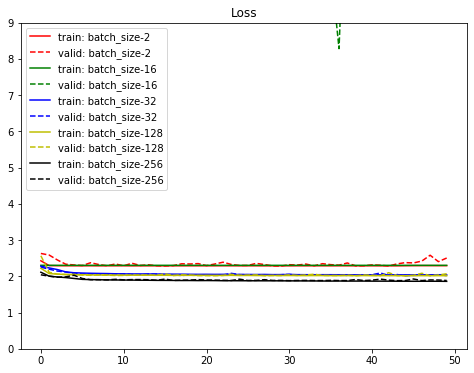

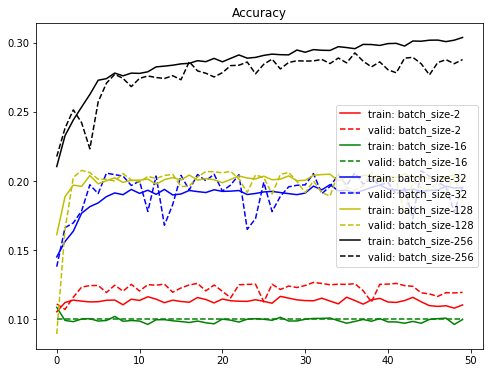

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline

color_bar = ["r", "g", "b", "y", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 9])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=f"train: {cond}", color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=f"valid: {cond}", color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [36]:
from keras.layers import  Activation
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
            x = keras.layers.Activation('relu')(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [37]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [38]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_86 (Batc (None, 512)               2048      
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_87 (Batc (None, 256)               1024      
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
__________

Epoch 47/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.4005 - acc: 0.9049 - val_loss: 1.9091 - val_acc: 0.4485
Epoch 48/50
50000/50000 [==============================] - 5s 103us/step - loss: 0.3840 - acc: 0.9110 - val_loss: 1.9428 - val_acc: 0.4535
Epoch 49/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.3653 - acc: 0.9180 - val_loss: 1.9525 - val_acc: 0.4501
Epoch 50/50
50000/50000 [==============================] - 5s 104us/step - loss: 0.3505 - acc: 0.9219 - val_loss: 1.9784 - val_acc: 0.4542


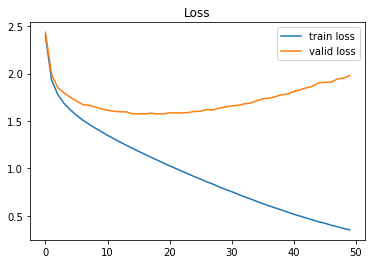

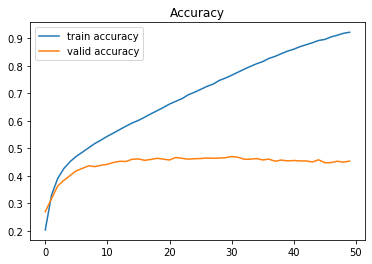

In [39]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [40]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
#             x = BatchNormalization()(x)
#             x = keras.layers.Activation('relu')(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
#             x = BatchNormalization()(x)
#             x = keras.layers.Activation('relu')(x)
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x) 
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [41]:
## 超參數設定
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [42]:
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_19 (InputLayer)        (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 7s 143us/step - loss: 2.

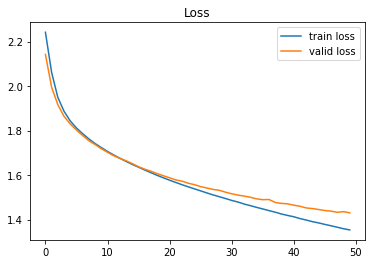

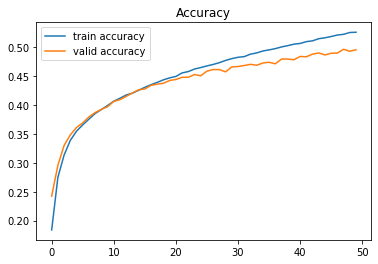

In [43]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()